# OSMnx: Python for Street Networks

### Planetizen Course

Author: [Geoff Boeing](http://geoffboeing.com/)

OSMnx is a Python library that lets you download spatial geometries and construct, project, analyze, and visualize street networks using OpenStreetMap data.

More info about OSMnx: https://github.com/gboeing/osmnx

In [1]:
import osmnx as ox, geopandas as gpd, pandas as pd, networkx as nx
from IPython.display import Image
%matplotlib inline
ox.config(log_console=True, use_cache=True)

## Chapter 3: Downloading shapefiles with OSMnx

OSMnx lets you download spatial "place boundary" geometries from OpenStreetMap, save them to shapefiles, project them, and plot them. For a more in-depth demonstration of creating these shapefiles, see [OSMnx examples](https://github.com/gboeing/osmnx).

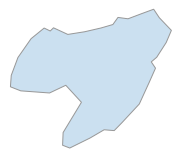

In [2]:
# get the boundary polygon for manhattan, save it as a shapefile, project it to UTM, and plot it
city = ox.gdf_from_place('Manhattan Island, New York, NY, USA')
ox.save_gdf_shapefile(city)
city = ox.project_gdf(city)
fig, ax = ox.plot_shape(city, figsize=(3,3))

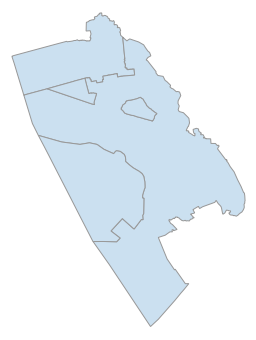

In [3]:
# get the boundary polygons for multiple cities, save as shapefile, project to UTM, and plot
place_names = ['Berkeley, California, USA', 
               'Oakland, California, USA',
               'Piedmont, California, USA',
               'Emeryville, California, USA',
               'Alameda, Alameda County, CA, USA']
east_bay = ox.gdf_from_places(place_names)
ox.save_gdf_shapefile(east_bay)
east_bay = ox.project_gdf(east_bay)
fig, ax = ox.plot_shape(east_bay)

In [4]:
east_bay

,geometry,place_name,bbox_north,bbox_south,bbox_east,bbox_west
0,"POLYGON ((555526.576 4191531.673, 555750.485 4...","Berkeley, Alameda County, California, United S...",37.9066896,37.835727,-122.2341962,-122.3686793
1,"POLYGON ((556678.142 4187784.271, 557199.564 4...","Oakland, Alameda County, California, United St...",37.8854257,37.6336763,-122.1144203,-122.355881
2,"POLYGON ((566060.935 4186514.176, 566106.491 4...","Piedmont, Alameda County, California, 94611, U...",37.833026,37.812276,-122.210148,-122.249374
3,"POLYGON ((558937.457 4188393.891, 563185.478 4...","Emeryville, Alameda County, California, 94608,...",37.8499727,37.827075,-122.276012,-122.3301569
4,"POLYGON ((558078.347 4183899.601, 558660.765 4...","Alameda, Alameda County, California, United St...",37.800628,37.707621,-122.223859,-122.340281


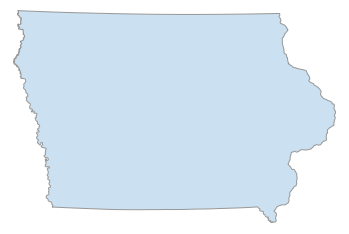

In [5]:
# or get shapes of boroughs, counties, states, countries - anything OpenStreetMap has boundary geometry for
country = ox.gdf_from_place('Iowa')
country = ox.project_gdf(country)
fig, ax = ox.plot_shape(country)

## Chapter 4: Downloading street networks with OSMnx

OSMnx lets you download street network data and build topologically-corrected street networks, project and plot the networks, and save the street network as SVGs, GraphML files, or shapefiles for later use. The street networks are directed and preserve one-way directionality. For a more in-depth demonstration of creating street networks, see [OSMnx examples](https://github.com/gboeing/osmnx).

You can download a street network by providing OSMnx any of the following (demonstrated in the examples below):
  - a bounding box
  - a lat-long point plus a distance
  - an address plus a distance
  - a place name or list of place names (to automatically geocode and get the boundary of)
  - a polygon of the desired street network's boundaries

You can also specify several different network types:
  - 'drive' - get drivable public streets (but not service roads)
  - 'drive_service' - get drivable streets, including service roads
  - 'walk' - get all streets and paths that pedestrians can use (this network type ignores one-way directionality)
  - 'bike' - get all streets and paths that cyclists can use
  - 'all' - download all non-private OSM streets and paths (this is the default network type unless you specify a different one)
  - 'all_private' - download all OSM streets and paths, including private-access ones

 #### Method #1, pass a bounding box ####
 This constructs the network from all the OSM nodes and ways within the bounding box.

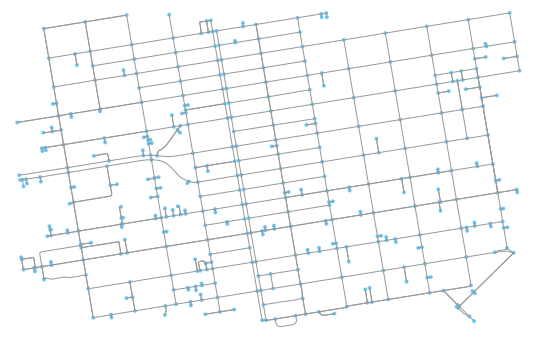

In [6]:
# define a bounding box in San Francisco
north, south, east, west = 37.79, 37.78, -122.41, -122.43

# create network from that bounding box
G1 = ox.graph_from_bbox(north, south, east, west, network_type='drive_service')
G1 = ox.project_graph(G1)
fig, ax = ox.plot_graph(G1)

#### Method #2, pass a lat-long point and bounding box distance in meters#### 
This creates a bounding box *n* meters North, South, East, and West of the point, then constructs the network from all the OSM nodes and ways within the bounding box.

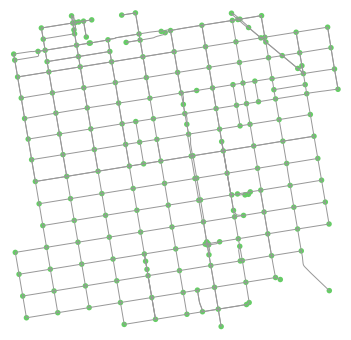

In [7]:
# define a point at the corner of California St and Mason St in SF
location_point = (37.791427, -122.410018)

# create network from point, inside bounding box of N, S, E, W each 750m from point
G2 = ox.graph_from_point(location_point, distance=750, distance_type='bbox', network_type='drive')
G2 = ox.project_graph(G2)
fig, ax = ox.plot_graph(G2, node_size=30, node_color='#66cc66')

#### Method #3, pass a (lat,lon) point and *network* distance in meters ####

This creates a bounding box *n* meters North, South, East, and West of the point, then constructs the network from all the OSM nodes and ways within the bounding box. Then it prunes the network by removing all nodes further than *n* meters from the point along the network.

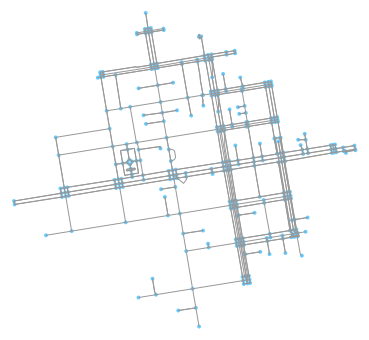

In [8]:
# same point again, but create network only of nodes within 500m along the network from point
G3 = ox.graph_from_point(location_point, distance=500, distance_type='network')
G3 = ox.project_graph(G3)
fig, ax = ox.plot_graph(G3)

*Note* the plot above shows the network within 500m (traveling distance along the network) from the `location_point`. By default, the `network_type` parameter value is 'all', meaning that we do not filter out paths that restrict certain types of traffic. This also means that one-way streets are honored as one-way and you cannot travel the wrong direction down them. Thus, the 500m takes into account only those nodes you can reach within 500m while only traveling in the allowed direction of the street. Instead (below), we can specify `network_type='walk'` to build a street network only of paths that walking is allowed on. This also makes every path bi-directional in the directed network, because you can walk in either direction on the sidewalk of a one-way street. Thus, the 500m now takes into account those nodes you can reach within 500m while traveling in either direction (even if it's a one-way street).

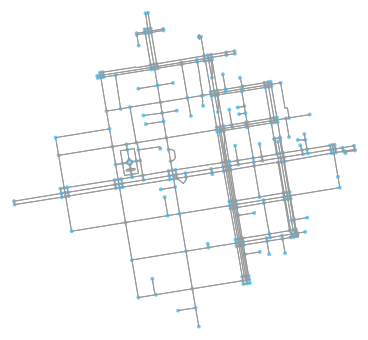

In [9]:
# create network only of nodes within 500m walking along the network from point
G3 = ox.graph_from_point(location_point, distance=500, distance_type='network', network_type='walk')
G3 = ox.project_graph(G3)
fig, ax = ox.plot_graph(G3)

#### Method #4, pass an address and distance (*bounding box* or *network*) in meters ####
This geocodes the address, creates a bounding box, downloads the network, then prunes it by network distance (if distance_type='network').

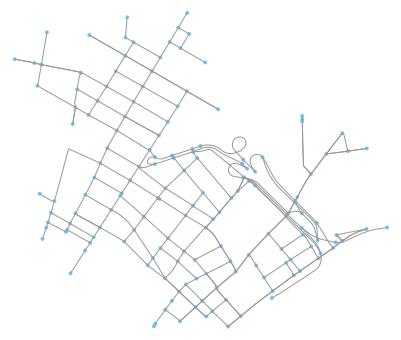

In [10]:
# network from address, including only nodes within 1km along the network from the address
G4 = ox.graph_from_address(address='350 5th Ave, New York, NY', 
                              distance=1000, distance_type='network', network_type='drive')

# you can project the network to UTM (zone calculated automatically)
G4_projected = ox.project_graph(G4)
fig, ax = ox.plot_graph(G4_projected)

#### Method #5, pass a place name ####

This geocodes the place name, gets the place's boundary shape polygon and bounding box, downloads the network within the bounding box, then prunes all nodes that lie outside the place's boundary polygon.

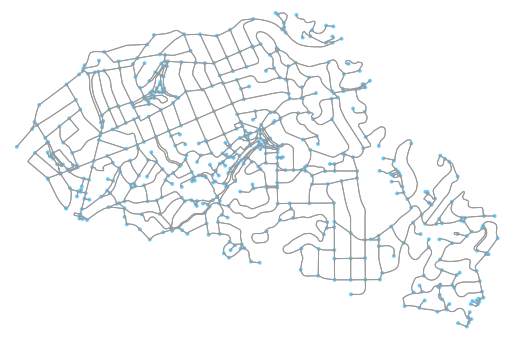

In [11]:
# create the street network within the city of Piedmont's borders
G5 = ox.graph_from_place('Piedmont, California, USA', network_type='walk')
G5_projected = ox.project_graph(G5)
fig, ax = ox.plot_graph(G5_projected)

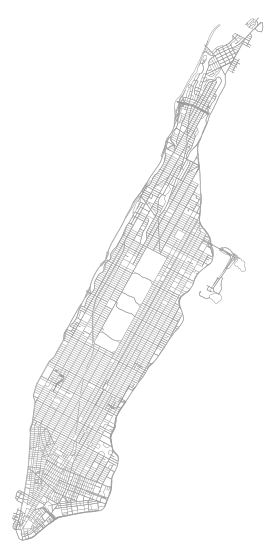

In [12]:
# create the street network within Manhattan
G5 = ox.graph_from_place('Manhattan, New York, NY, USA', network_type='drive')
G5_projected = ox.project_graph(G5)
fig, ax = ox.plot_graph(G5_projected, fig_height=10, node_size=0, edge_linewidth=0.5)

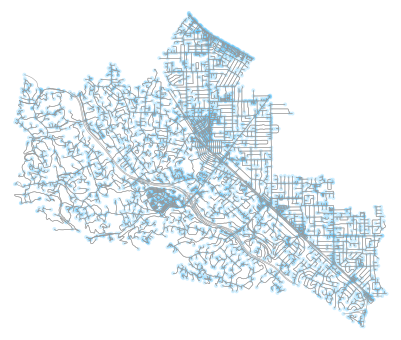

In [13]:
# you can also pass multiple places as a mixed list of strings and/or structured queries
places = ['Los Altos, California, USA',
          {'city':'Los Altos Hills', 'state':'California'},
          'Loyola, California']
G5 = ox.graph_from_place(places, clean_periphery=False)
G5_projected = ox.project_graph(G5)
fig, ax = ox.plot_graph(G5_projected, fig_height=6, node_alpha=0.3, edge_linewidth=0.5)
ox.save_graph_shapefile(G5, filename='silicon-valley')

#### Method #6, pass a polygon ####

This example loads the [Mission District](http://www.zillow.com/howto/api/neighborhood-boundaries.htm)'s polygon from a shapefile, then downloads the network within its bounding box, then prunes all nodes that lie outside the place's boundary polygon.

In [14]:
calif = gpd.read_file('input_data/ZillowNeighborhoods-CA')
calif.head()

,STATE,COUNTY,CITY,NAME,REGIONID,geometry
0,CA,Alameda,Fremont,28 Palms,272706.0,"POLYGON ((-121.98757 37.52286, -121.98773 37.5..."
1,CA,Alameda,Fremont,Ardenwood,268001.0,"POLYGON ((-122.04133 37.56604, -122.04069 37.5..."
2,CA,Alameda,Fremont,Baylands,268017.0,"POLYGON ((-121.94596 37.49091, -121.93807 37.4..."
3,CA,Alameda,Fremont,Blacow,268026.0,"POLYGON ((-121.97197 37.52264, -121.97077 37.5..."
4,CA,Alameda,Fremont,Brookvale,268034.0,"MULTIPOLYGON (((-122.00390 37.58150, -121.9969..."


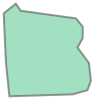

In [15]:
mission_district = calif[(calif['CITY']=='San Francisco') & (calif['NAME']=='Mission')]
polygon = mission_district['geometry'].iloc[0]
polygon

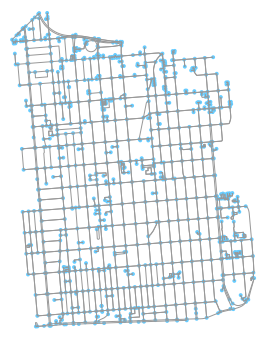

In [16]:
G6 = ox.graph_from_polygon(polygon, network_type='drive_service')
G6_projected = ox.project_graph(G6)
fig, ax = ox.plot_graph(G6_projected)

Simplification is normally done by OSMnx automatically under the hood, but we can break it out to see how it works. OpenStreetMap nodes are weird. They include intersections, but they also include all the points along a single block where the street curves. The latter are not nodes in the graph theory sense, so we remove them algorithmically and consolidate the set of edges between "true" network nodes into a single edge. There are two simplification modes, strict and non-strict. The main difference is that unlike strict mode, non-strict mode allows simplification to an "expansion graph" (ie, if the graph were undirected, nodes with degree 2 as long as the incident edges have different OSM IDs). For a more in-depth demonstration of topological simplification with OSMnx, see [OSMnx examples](https://github.com/gboeing/osmnx).

In [17]:
# create a network around some (lat, lon) point but do not simplify it yet
location_point = (33.299896, -111.831638)
G = ox.graph_from_point(location_point, network_type='drive_service', distance=500, simplify=False)

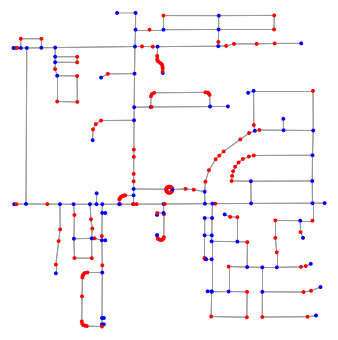

In [18]:
# turn off strict mode and see what nodes we'd remove, in red
nc = ['b' if ox.is_endpoint(G, node) else 'r' for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_color=nc, node_zorder=3)

The red and blue dots above are OSM nodes. We'll remove the nodes in red as they're not real network nodes.

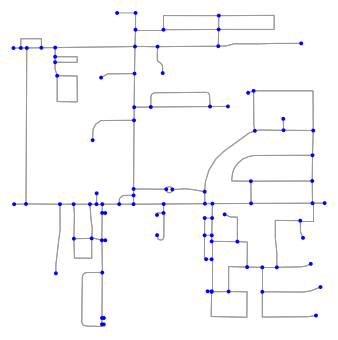

In [19]:
# simplify the network
G = ox.simplify_graph(G)
fig, ax = ox.plot_graph(G, node_color='b', node_zorder=3)

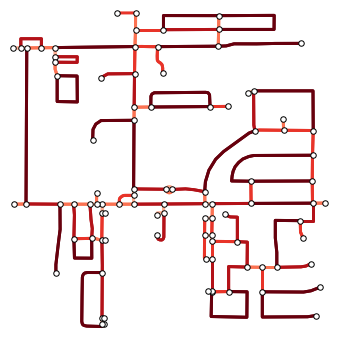

In [20]:
# show the simplified network with edges colored by edge length
ec = ox.get_edge_colors_by_attr(G, attr='length', cmap='Reds', start=0.3)
fig, ax = ox.plot_graph(G, node_color='w', node_edgecolor='k', node_size=30, 
                           node_zorder=3, edge_color=ec, edge_linewidth=3)

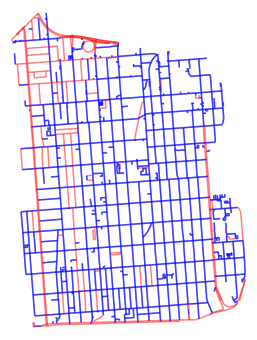

In [21]:
# highlight all the one-way edges in the mission district network from earlier
ec = ['r' if data['oneway'] else 'b' for u, v, key, data in G6.edges(keys=True, data=True)]
fig, ax = ox.plot_graph(G6, node_size=0, edge_color=ec, edge_linewidth=1.5, edge_alpha=0.5)

In [22]:
# save street network as ESRI shapefile to work with in GIS
ox.save_graph_shapefile(G, filename='network-shape')

In [23]:
# save street network as GraphML file to work with in networkx or gephi
ox.save_graphml(G, filename='network.graphml')

In [24]:
# save street network as SVG to work with in Adobe Illustrator
fig, ax = ox.plot_graph(G, show=False, save=True, filename='network', file_format='svg')

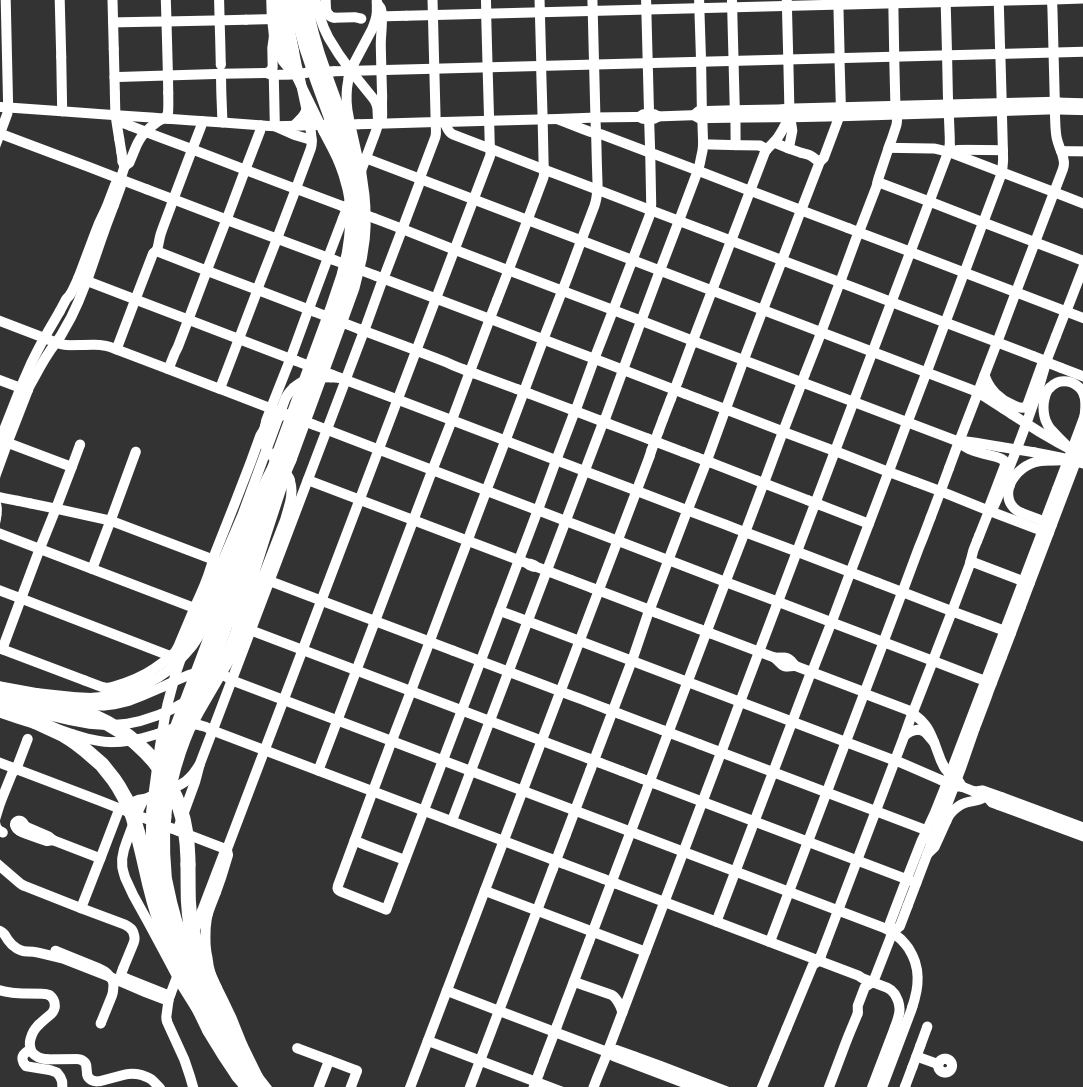

In [25]:
# figure-ground diagram of central portland, oregon
point = (45.517309, -122.682138)
fig, ax = ox.plot_figure_ground(point=point, filename='pdx', network_type='drive', dpi=180)
Image('images/pdx.png', height=300, width=300)

## Chapter 5: Street network analysis

In [26]:
# get the network for Piedmont, calculate its basic stats, then show the average circuity
ox.basic_stats(ox.graph_from_place('Piedmont, California, USA', network_type='drive_service'))

{'n': 413,
 'm': 1076,
 'k_avg': 5.210653753026635,
 'intersection_count': 350,
 'streets_per_node_avg': 2.828087167070218,
 'streets_per_node_counts': {0: 0, 1: 63, 2: 2, 3: 296, 4: 48, 5: 3, 6: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.15254237288135594,
  2: 0.004842615012106538,
  3: 0.7167070217917676,
  4: 0.1162227602905569,
  5: 0.007263922518159807,
  6: 0.002421307506053269},
 'edge_length_total': 119600.45299999985,
 'edge_length_avg': 111.15283736059466,
 'street_length_total': 62438.693000000014,
 'street_length_avg': 111.10087722419931,
 'street_segments_count': 562,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 1.1127640114023865,
 'self_loop_proportion': 0.0055762081784386614,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

To calculate density-based metrics, you must also pass the network's bounding area in square meters (otherwise `basic_stats()` will just skip them in the calculation):

In [27]:
# get the street network for a place, and its area in square meters (by projecting)
place = 'Piedmont, California, USA'
gdf = ox.gdf_from_place(place)
area = ox.project_gdf(gdf).unary_union.area
G = ox.graph_from_place(place, network_type='drive_service')

In [28]:
# calculate basic stats + densities
stats = ox.basic_stats(G, area=area)
stats

{'n': 413,
 'm': 1076,
 'k_avg': 5.210653753026635,
 'intersection_count': 350,
 'streets_per_node_avg': 2.828087167070218,
 'streets_per_node_counts': {0: 0, 1: 63, 2: 2, 3: 296, 4: 48, 5: 3, 6: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.15254237288135594,
  2: 0.004842615012106538,
  3: 0.7167070217917676,
  4: 0.1162227602905569,
  5: 0.007263922518159807,
  6: 0.002421307506053269},
 'edge_length_total': 119600.45299999985,
 'edge_length_avg': 111.15283736059466,
 'street_length_total': 62438.693000000014,
 'street_length_avg': 111.10087722419931,
 'street_segments_count': 562,
 'node_density_km': 94.97403451932588,
 'intersection_density_km': 80.4864699316321,
 'edge_density_km': 27503.48075484019,
 'street_density_km': 14358.485676328311,
 'circuity_avg': 1.1127640114023865,
 'self_loop_proportion': 0.0055762081784386614,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

In [29]:
# proportion of intersections that are cul-de-sacs, T-intersections, and 4-way intersections?
print(stats['streets_per_node_proportion'][1])
print(stats['streets_per_node_proportion'][3])
print(stats['streets_per_node_proportion'][4])

0.15254237288135594
0.7167070217917676
0.1162227602905569


## Chapter 6: Routing

In [30]:
origin = list(G.nodes())[0]
dest = list(G.nodes())[-1]

In [31]:
# find the shortest path between these nodes
route = nx.shortest_path(G, origin, dest, weight='length')
route

[53090322,
 53082634,
 53082640,
 53082643,
 53082644,
 686202982,
 53082645,
 2833994093,
 53041445,
 53082619,
 53082621,
 318538000,
 53082625,
 206141022,
 53082627,
 53073691,
 53033660,
 432431093]

In [32]:
# what is the total length of the route (in meters)?
nx.shortest_path_length(G, origin, dest, weight='length')

1225.787

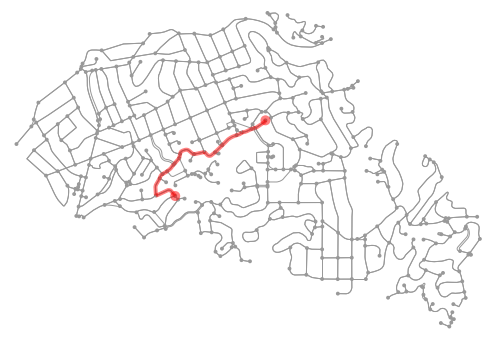

In [33]:
# plot it
fig, ax = ox.plot_graph_route(G, route)

## Chapter 7: Building footprints

In [34]:
gdf = ox.footprints_from_place(place='Piedmont, California, USA')
gdf_proj = ox.project_gdf(gdf)
gdf_proj.area.head()

28861558    1803.150024
28861563     775.876377
28861579    1592.614378
28861587     905.728909
28861590    2434.779855
dtype: float64

In [35]:
# save as a shapefile
gdf.drop(labels='nodes', axis=1).to_file('data/piedmont_bldgs')

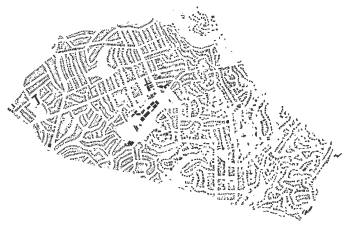

In [36]:
fig, ax = ox.plot_footprints(gdf_proj)

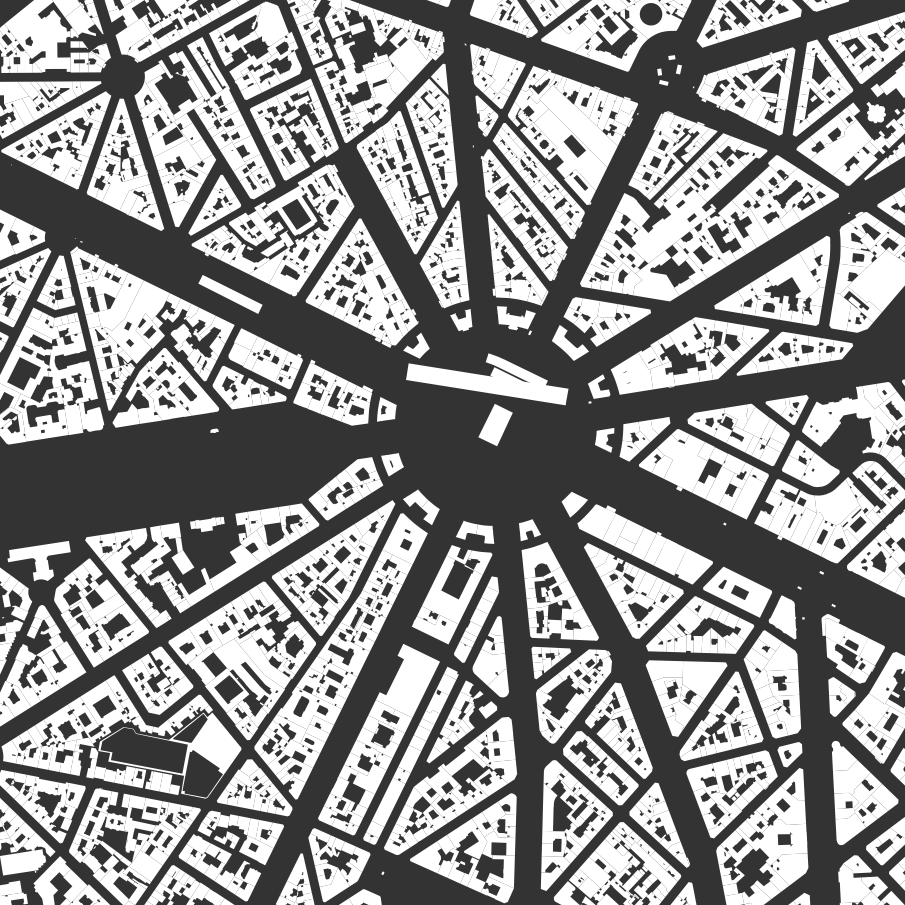

In [37]:
# figure-ground diagram of building footprints in paris
point = (48.873446, 2.294255)
dist = 612
gdf = ox.footprints_from_point(point=point, distance=dist)
gdf_proj = ox.project_gdf(gdf)
bbox = ox.bbox_from_point(point=point, distance=dist, project_utm=True)
fig, ax = ox.plot_footprints(gdf_proj, bgcolor='#333333', color='w', figsize=(4,4), bbox=bbox,
                            save=True, show=False, close=True, filename='paris_bldgs', dpi=300)
Image('images/paris_bldgs.png', height=400, width=400)